## Iris dataset
**It contains measurements of different parts of the iris flower, including the sepal length, sepal width, petal length, and petal width, as well as the corresponding species label for each observation. There are 150 observations in total, with 50 observations for each of the three iris species: setosa, versicolor, and virginica.**

This cell imports the load_iris() function from the sklearn.datasets module and uses it to load the Iris dataset which is mentioned above. The data is stored in the iris variable as a dictionary-like object with keys for the data (iris.data), target labels (iris.target), and other information about the dataset (iris.DESCR). Take a note of all the keys displayed below which constitute information about iris dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- These are the features of each datapoint in the Iris dataset, which are length and width of petal and sepal
- We will be training our model on these features combinedly to predict an unknown datapoint to which class it belongs

In [2]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- These are the names of classes in the Iris dataset
- Each datapoint belongs to any one of the class
- Our job is to train the model so that an unknown datapoint can be labeled based on its features

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Since we cannot plot all 4 features simultaneously in 4D space, we plot two graphs with 2 features at a time<br/>**
Scatter plot of datapoints with respective 2 features namely
 - Sepal Length
 - Sepal Width

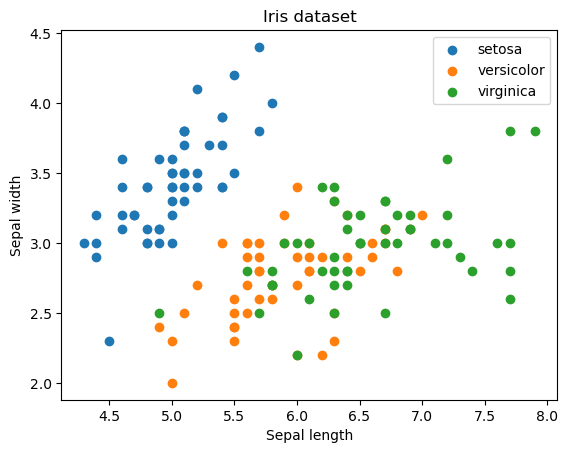

In [4]:
import matplotlib.pyplot as plt

# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 0], iris.data[iris.target==i, 1], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

Scatter plot of datapoints with respective 2 features namely
 - Petal Length
 - Petal Width

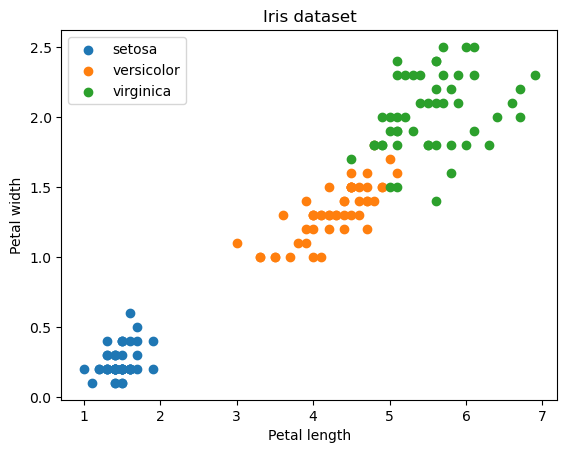

In [5]:
# Plot each class with different colors
for i in range(iris.target_names.shape[0]):
    plt.scatter(iris.data[iris.target==i, 2], iris.data[iris.target==i, 3], label=iris.target_names[i])

# Set plot labels
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')

# Show plot
plt.legend()
plt.show()

## Agglomerative Clustering
- **Agglomerative clustering is a hierarchical clustering method in which the algorithm starts with each point as a separate cluster and iteratively merges the two closest clusters until all points belong to a single cluster.**
- **We can specify a parameter number of clusters which stops the algorithm when that number is reached and does not continue clustering the entire data into a single cluster which would be pointless**
- **The distance between clusters is usually defined as the distance between their closest points, but other distance measures can also be used.**
- **The resulting hierarchy of clusters can be represented as a dendrogram, which can help visualize the clustering structure.**
- **Agglomerative clustering can be used for various applications such as image segmentation, gene expression analysis, and customer segmentation.**

Loading Iris dataset from sklearn

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

- The code imports the `AgglomerativeClustering` algorithm from the `sklearn.cluster` module and initializes it with a parameter "n_clusters" set to 3, which specifies the number of clusters to form.
- The algorithm is then fit to the iris dataset by calling the "fit" method on the model object and passing the dataset as the argument.
- The algorithm works by iteratively merging the closest pairs of clusters until only the desired number of clusters is left.
- The resulting clusters can be accessed using the "labels_" attribute of the fitted model object.

In [7]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)

# Fit the model on data
model.fit(iris.data)

AgglomerativeClustering(n_clusters=3)

- Here we display the obtained clusters an compare them with original dataset we have
- We can also see how the unlabaled data is then transformed into clustered data using Agglomerative clustering
- We can compare the original dataset, unlabeled dataset and the clusters

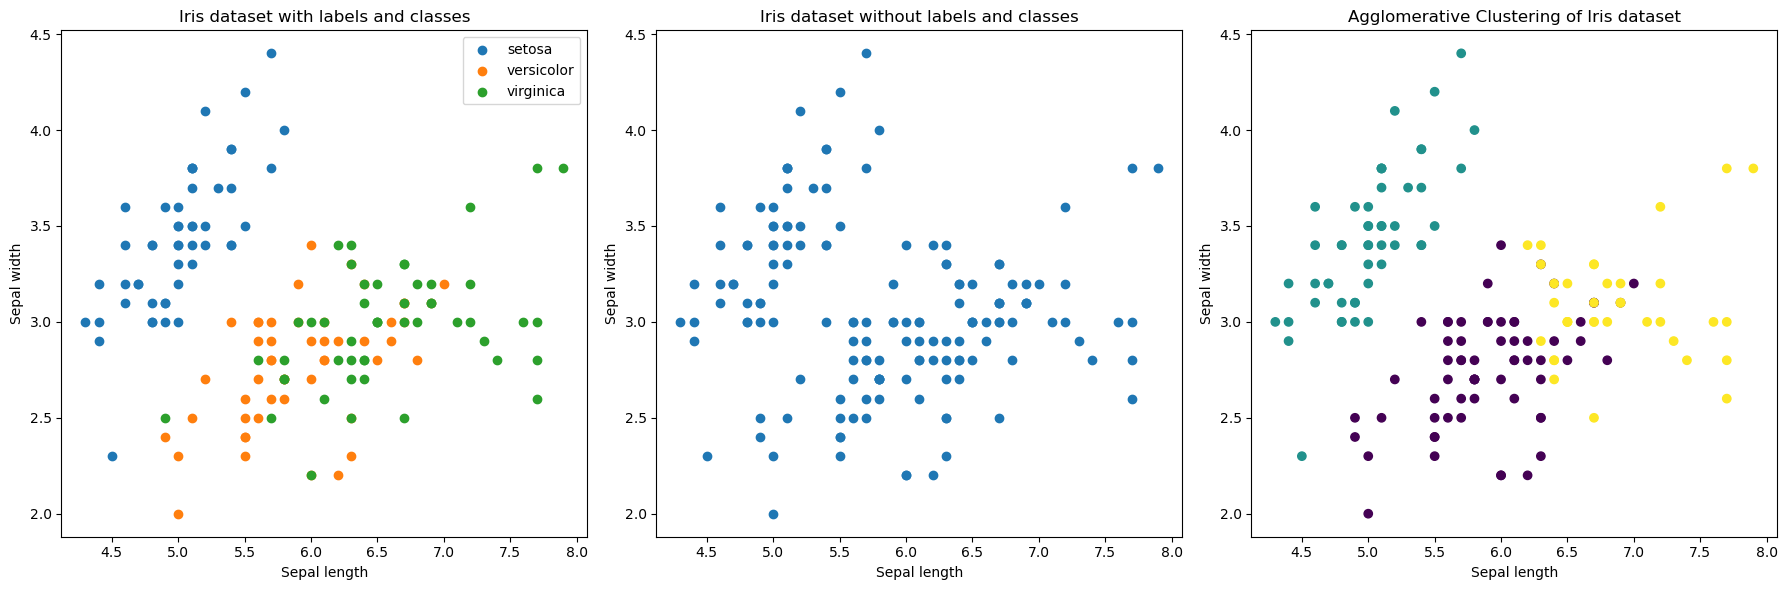

In [8]:
import matplotlib.pyplot as plt

# Create a figure with a larger width
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the iris dataset with labels and classes
for i in range(iris.target_names.shape[0]):
    axs[0].scatter(iris.data[iris.target==i, 0], iris.data[iris.target==i, 1], label=iris.target_names[i])
axs[0].set_xlabel('Sepal length')
axs[0].set_ylabel('Sepal width')
axs[0].set_title('Iris dataset with labels and classes')
axs[0].legend()

# Plot the iris dataset without labels and classes
axs[1].scatter(iris.data[:, 0], iris.data[:, 1])
axs[1].set_xlabel('Sepal length')
axs[1].set_ylabel('Sepal width')
axs[1].set_title('Iris dataset without labels and classes')

# Plot the DBSCAN clustering
axs[2].scatter(iris.data[:, 0], iris.data[:, 1], c=model.labels_, cmap='viridis')
axs[2].set_xlabel('Sepal length')
axs[2].set_ylabel('Sepal width')
axs[2].set_title('Agglomerative Clustering of Iris dataset')

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()


## Geology dataset
- **It consists of 233 datapoints each one having 19 features and a class label**
- **Of the 19 features first feature is the ID of datapoint represented as FID, one of the feature has high frequency of unknown values so this feature is discarded from model training**
- **Hence useful features are 17 and 1 class label**
- **All features are categorical type meaning only certain values are permitted for that feature**

In [9]:
import pandas as pd

# Import dataset
df = pd.read_csv('trainingTestingDataset.csv')

# Get target and feature variables
y = df['label']
X = df.drop(['RCLS_GEOL', 'FID', 'label'], axis=1)
X = X.iloc[:, :]

print('Initial columns:', df.columns)
print('\nUseful columns:', X.keys())

Initial columns: Index(['FID', 'RCL_D2FLT', 'RCLS_CHM_C', 'RCLS_CHM_D', 'RCLS_COM_C',
       'RCLS_COM_D', 'RCLS_CTCT_', 'RCLS_D1ANT', 'RCLS_D1FLT', 'RCLS_D1XD2',
       'RCLS_D2_X', 'RCLS_D2ANT', 'RCLS_D2FLT', 'RCLS_DE_D2', 'RCLS_DELFT',
       'RCLS_DOL_D', 'RCLS_GEOL', 'RCLS_GRN', 'RCLS_STR_D', 'label'],
      dtype='object')

Useful columns: Index(['RCL_D2FLT', 'RCLS_CHM_C', 'RCLS_CHM_D', 'RCLS_COM_C', 'RCLS_COM_D',
       'RCLS_CTCT_', 'RCLS_D1ANT', 'RCLS_D1FLT', 'RCLS_D1XD2', 'RCLS_D2_X',
       'RCLS_D2ANT', 'RCLS_D2FLT', 'RCLS_DE_D2', 'RCLS_DELFT', 'RCLS_DOL_D',
       'RCLS_GRN', 'RCLS_STR_D'],
      dtype='object')


Below is the plot of this dataset and we will be performing Agglomerative clustering to find out number of clusters in the dataset and its pattern

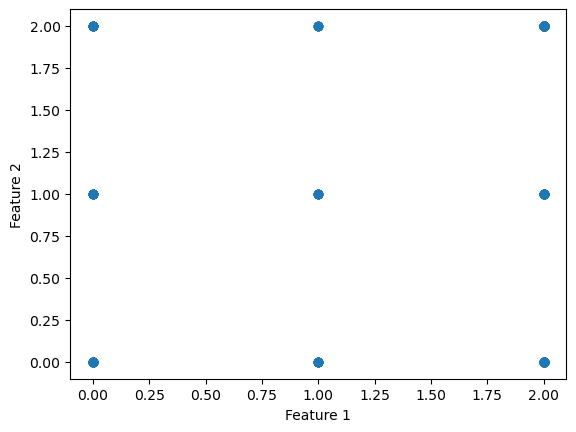

In [10]:
import matplotlib.pyplot as plt

# plot the dataset with respective two variables
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- Here we are reading the dataset from a csv file
- As mentioned we are only interested in the useful features and class label
- Hence we discard the columns `RCLS_GEOL` and `FID`
- Note that we also discard the column `label` since it is the target variable and should not interfere with training process
- Then we proceed to evaluate our model

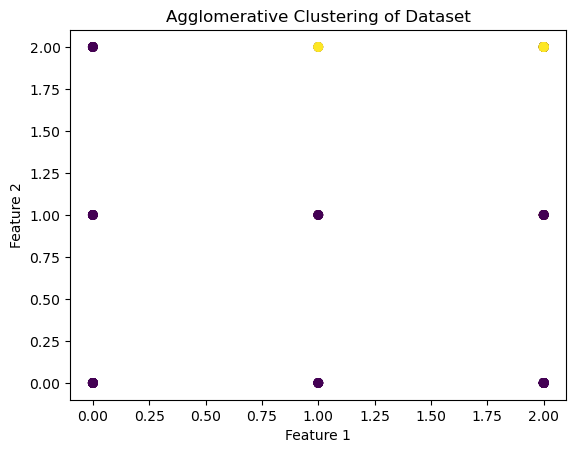

In [11]:
# Apply agglomerative clustering
model = AgglomerativeClustering(n_clusters=2)
clusters = model.fit_predict(X)

# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering of Dataset')
plt.show()
